In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = 'Malgun Gothic'

### [실습]
* 기상 데이터 분석
* 데이터 수집 : 리눅스인 경우 !wget "url", 윈도우인 경우 !curl url
* 2010년부터 10년간 울릉도 지역의 기온과 풍속을 측정한 데이터

In [119]:
# 데이터 셋 가져오기 **잘알아두기** -o은 아웃푸시 
!curl -k https://raw.githubusercontent.com/dongupak/BigDataAnalysis/main/weather.csv -o  weather.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 88955  100 88955    0     0   124k      0 --:--:-- --:--:-- --:--:--  125k
100 88955  100 88955    0     0   124k      0 --:--:-- --:--:-- --:--:--  125k


In [213]:
# 1. 데이터프레임 탐색
weather = pd.read_csv("weather.csv", index_col = 0)

In [194]:
# 2. 데이터 정제

# 1) 개별적인 열의 개수 확인 
print(weather.count())
print()
# 2) 결측치 탐지 및 처리
missing_data = weather[weather['평균 풍속'].isna()]
print(missing_data )
print()
#3) 결측 값을 평균 풍속으로 채움, inplace를 True로 설정해 원본 데이터를 수정
mean_wind = weather['평균 풍속'].mean()
weather.fillna(mean_wind, inplace=True)
weather

평균 기온    3653
최대 풍속    3649
평균 풍속    3647
dtype: int64

            평균 기온  최대 풍속  평균 풍속
일시                             
2012-02-11   -0.7    NaN    NaN
2012-02-12    0.4    NaN    NaN
2012-02-13    4.0    NaN    NaN
2015-03-22   10.1   11.6    NaN
2015-04-01    7.3   12.1    NaN
2019-04-18   15.7   11.7    NaN



,평균 기온,최대 풍속,평균 풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


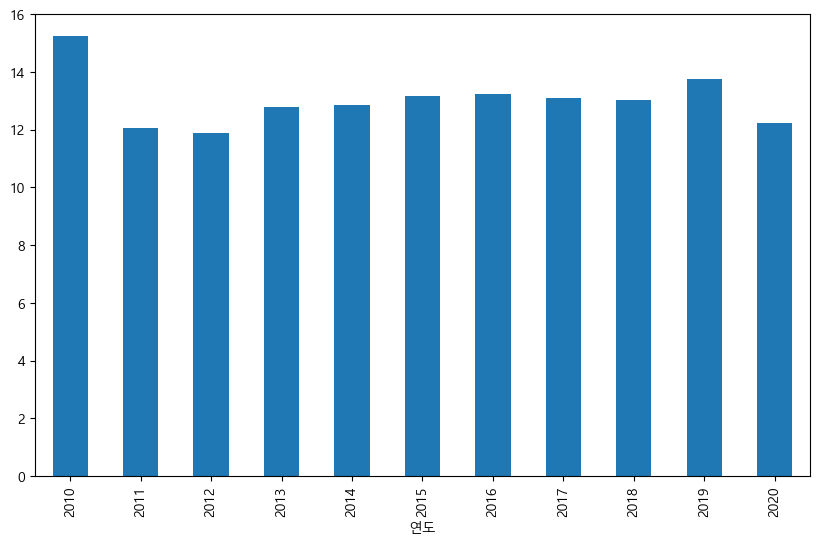

In [195]:
# 3.[데이터분석] "평균 기온" 열에서 어느 연도에  평균 기온이 가장 높았는지 연도별 평균 기온을 막대그래프로 그리기
weather.index = pd.to_datetime(weather.index)
weather["연도"] = weather.index.year
temp = weather.groupby("연도")["평균 기온"].mean()

plt.figure(figsize=(10,6))
temp.plot(kind='bar')
# weather["평균 기온"].head().plot(kind='bar')
plt.show()

In [196]:
# 3.1 데이터프레임 평탄화
weather.head()

,평균 기온,최대 풍속,평균 풍속,연도
일시,,,,
2010-08-01,28.7,8.3,3.4,2010
2010-08-02,25.2,8.7,3.8,2010
2010-08-03,22.1,6.3,2.9,2010
2010-08-04,25.3,6.6,4.2,2010
2010-08-05,27.2,9.1,5.6,2010


In [214]:
weather.reset_index(inplace=True)
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6


          일시  평균 기온  최대 풍속  평균 풍속    연도  year
0 2010-08-01   28.7    8.3    3.4  2010  2010
1 2010-08-02   25.2    8.7    3.8  2010  2010
2 2010-08-03   22.1    6.3    2.9  2010  2010
3 2010-08-04   25.3    6.6    4.2  2010  2010
4 2010-08-05   27.2    9.1    5.6  2010  2010


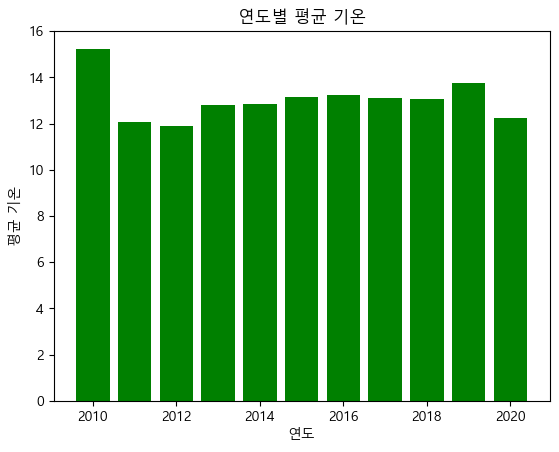

In [125]:
# 3.2 weather['일시']의 연도 값을 추출하여 weather['year']에 저장하여 데이터프레임에 추가하기

weather['year'] = pd.DatetimeIndex(weather['일시']).year
print(weather.head())
# 3.3 'year' 별 평균 기온의 평균값을 집계하기

yearly_temp = weather.groupby('year')['평균 기온'].mean()
# print(yearly_temp.head())
# 3.4 막대 그래프로 그리기
years = np.arange(2010,2021)
plt.bar(years, yearly_temp, color="green")
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.title("연도별 평균 기온")
plt.show()


In [126]:
weather.head()

,일시,평균 기온,최대 풍속,평균 풍속,연도,year
0,2010-08-01,28.7,8.3,3.4,2010,2010
1,2010-08-02,25.2,8.7,3.8,2010,2010
2,2010-08-03,22.1,6.3,2.9,2010,2010
3,2010-08-04,25.3,6.6,4.2,2010,2010
4,2010-08-05,27.2,9.1,5.6,2010,2010


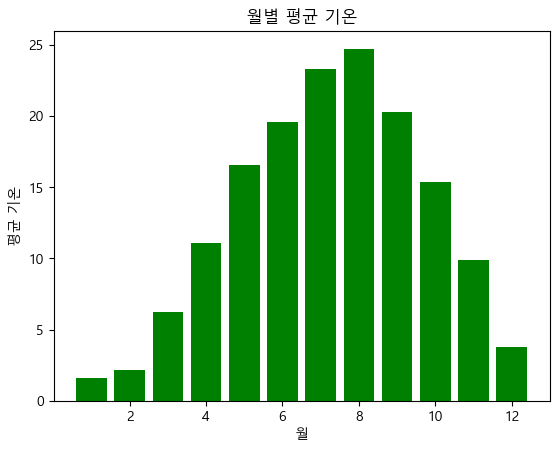

In [127]:
# [데이터분석] 4. 어느 월에  평균 기온이 가장 높았는지 월별 평균 기온을 막대그래프로 그리기
# month 속성을 사용하여 달별로 구분하여 평균 기온 값을 담기
weather['month'] = pd.DatetimeIndex(weather['일시']).month

monthly_temp = weather.groupby('month')['평균 기온'].mean()

months = np.arange(1,13)
plt.bar(months, monthly_temp, color="green")
plt.xlabel('월')
plt.ylabel('평균 기온')
plt.title("월별 평균 기온")
plt.show()


Text(0, 0.5, '평균 풍속')

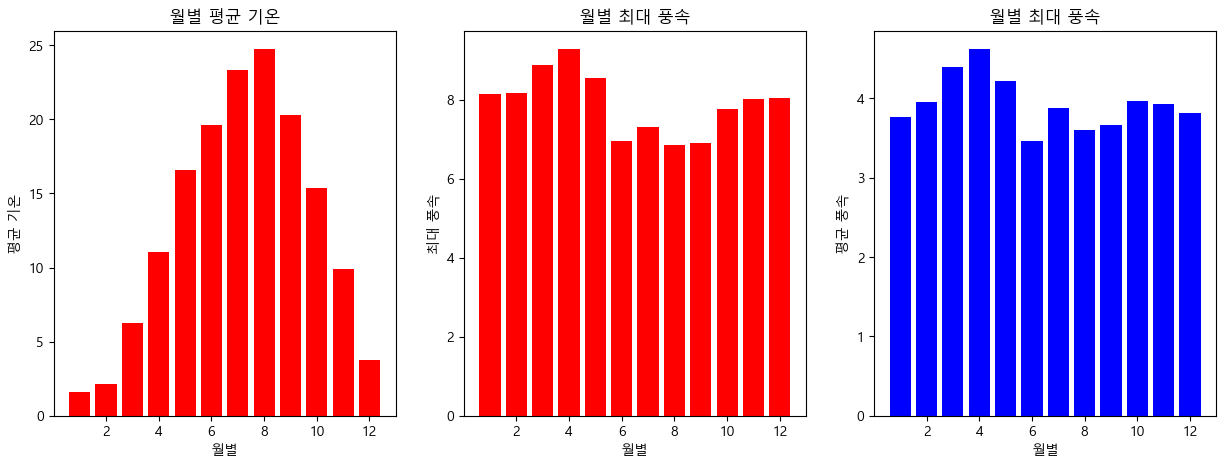

In [128]:
# [데이터 분석] 5. 기상 정보를 월별로 막대그래프로 그려서 분석하기
monthly_means = weather.groupby('month')[['평균 기온','최대 풍속', '평균 풍속']].mean()
monthly_means

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(1,13), monthly_means['평균 기온'], color = "red")
axs[0].set_title("월별 평균 기온")
axs[0].set_xlabel("월별")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(1,13), monthly_means['최대 풍속'], color = "red")
axs[1].set_title("월별 최대 풍속")
axs[1].set_xlabel("월별")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(1,13), monthly_means['평균 풍속'], color = "blue")
axs[2].set_title("월별 최대 풍속")
axs[2].set_xlabel("월별")
axs[2].set_ylabel("평균 풍속")

Text(0, 0.5, '평균 풍속')

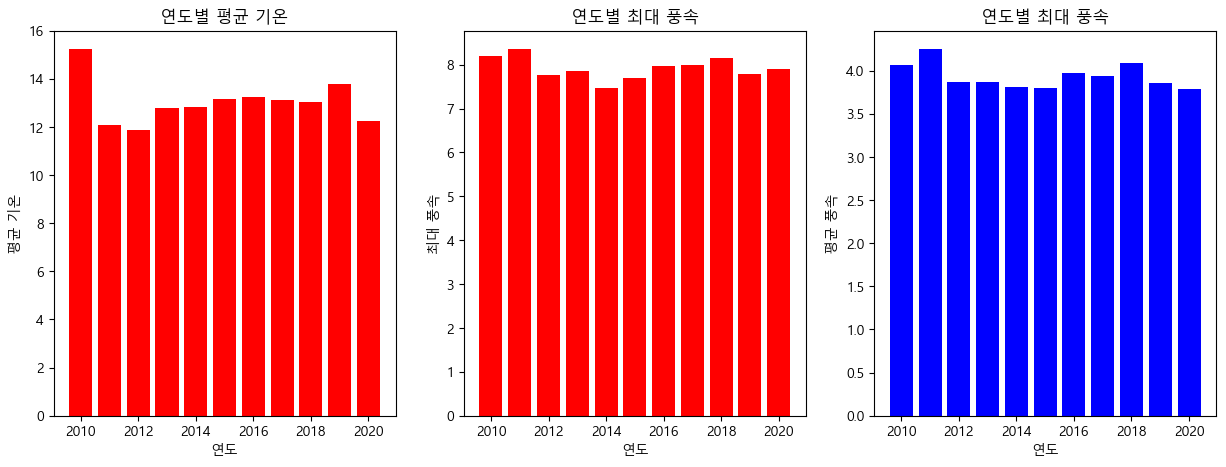

In [129]:
# [데이터분석] 6. 기상 정보를 연도별로 막대그래프로 그려서 분석하기
yearly_means = weather.groupby('year')[['평균 기온','최대 풍속', '평균 풍속']].mean()

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].bar(np.arange(2010,2021), yearly_means['평균 기온'], color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("연도")
axs[0].set_ylabel("평균 기온")


axs[1].bar(np.arange(2010,2021),yearly_means['최대 풍속'], color = "red")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("연도")
axs[1].set_ylabel("최대 풍속")


axs[2].bar(np.arange(2010,2021),yearly_means['평균 풍속'], color = "blue")
axs[2].set_title("연도별 최대 풍속")
axs[2].set_xlabel("연도")
axs[2].set_ylabel("평균 풍속")

In [25]:
# [데이터 분석] 7. 평균 풍속이 4.0이 넘는 달만 추출하기
## 필터링 : 특정한 조건 값을 주어서 데이터프레임의 값을 필터링하기

In [24]:
# weather[weather['평균 풍속'] >= 4.0]
monthly_means.head()
monthly_means[monthly_means['평균 풍속'] >= 4.0]

,평균 기온,최대 풍속,평균 풍속
month,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355


Text(0, 0.5, '빈도수')

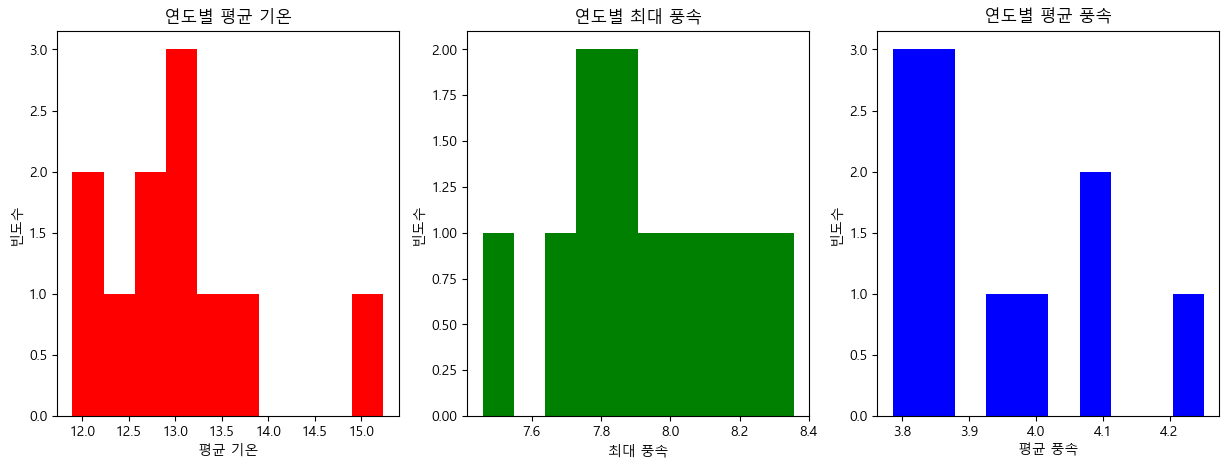

In [27]:
# [데이터 분석] 8. 연도별  '평균 기온', '최대 풍속', '평균 풍속'의 평균값을  각각 히스트그램으로 출력하시오.

# Calculate the yearly means
# yearly_means = weather.groupby('year')[['평균 기온', '최대 풍속', '평균 풍속']].mean()

# 히스토그램 그리기
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the histogram for average temperature
axs[0].hist(yearly_means['평균 기온'], bins=10, color = "red")
axs[0].set_title("연도별 평균 기온")
axs[0].set_xlabel("평균 기온")
axs[0].set_ylabel("빈도수")


# Plot the histogram for maximum wind speed
axs[1].hist(yearly_means['최대 풍속'], bins=10, color="green")
axs[1].set_title("연도별 최대 풍속")
axs[1].set_xlabel("최대 풍속")
axs[1].set_ylabel("빈도수")

# Plot the histogram for average wind speed
axs[2].hist(yearly_means['평균 풍속'], bins=10, color="blue")
axs[2].set_title("연도별 평균 풍속")
axs[2].set_xlabel("평균 풍속")
axs[2].set_ylabel("빈도수")


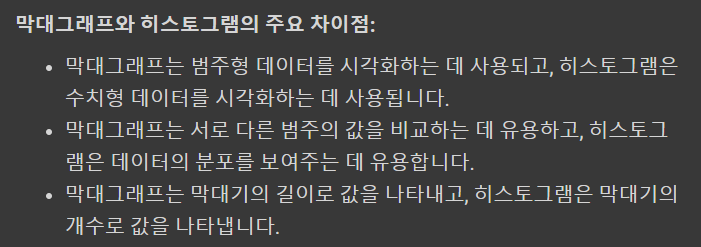

# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-16까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [149]:
print(weather.head(3))
print(weather.tail(3))

          일시  평균 기온  최대 풍속  평균 풍속    연도  year  month
0 2010-08-01   28.7    8.3    3.4  2010  2010      8
1 2010-08-02   25.2    8.7    3.8  2010  2010      8
2 2010-08-03   22.1    6.3    2.9  2010  2010      8
             일시  평균 기온  최대 풍속  평균 풍속    연도  year  month
3650 2020-07-29   21.6    3.2    1.0  2020  2020      7
3651 2020-07-30   22.9    9.7    2.4  2020  2020      7
3652 2020-07-31   25.7    4.8    2.5  2020  2020      7


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [217]:
# '일시' 열을 datetime 형태로 변환하고 인덱스로 설정합니다.
#1번 reset_index(inplace=True)를 하지 않았을 때 방법
# weather.index = pd.to_datetime(weather.index)
#2번 reset_index(inplace=True)를 했을 때 방법
weather.index = pd.to_datetime(weather['일시'])

# 2015년 6월 6일 데이터 선택
select_date = weather.loc["2015-06-06"]

# '평균 기온', '최대 풍속', '평균 풍속' 가져오기
mean_c = select_date["평균 기온"]
max_w = select_date["최대 풍속"]
mean_w = select_date["평균 풍속"]

# 결과 출력
print(f"2015년 6월 6일의 평균 기온: {mean_c}도")
print(f"2015년 6월 6일의 풍속 정보: 최대 풍속 {max_w}m/s, 평균 풍속 {mean_w}m/s")

2015년 6월 6일의 평균 기온: 16.6도
2015년 6월 6일의 풍속 정보: 최대 풍속 4.4m/s, 평균 풍속 1.9m/s


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [226]:
# weather의 평균 기온 열의 각 값이 최개값과 같은지 확인하고 그 행을 hot_day에 저장
hot_day = weather[weather['평균 기온'] == weather['평균 기온'].max()]
print(hot_day)

                    일시  평균 기온  최대 풍속  평균 풍속    연도
일시                                               
2013-08-08  2013-08-08   31.3    7.8    4.6  2013


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [225]:
#weather의 평균 기온이 30도가 넘는 행들을 인덱싱하여 over_30에 저장
over_30 = weather[weather['평균 기온'] > 30]
print(f"평균 기온이 30도를 넘는 날의 기상 데이터: {over_30}")

평균 기온이 30도를 넘는 날의 기상 데이터:                     일시  평균 기온  최대 풍속  평균 풍속    연도
일시                                               
2013-08-08  2013-08-08   31.3    7.8    4.6  2013
2013-08-09  2013-08-09   30.6    9.9    6.4  2013
2013-08-10  2013-08-10   30.6    7.4    3.8  2013
2018-07-23  2018-07-23   30.5    6.5    1.6  2018
2018-08-04  2018-08-04   30.3    5.8    3.0  2018


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

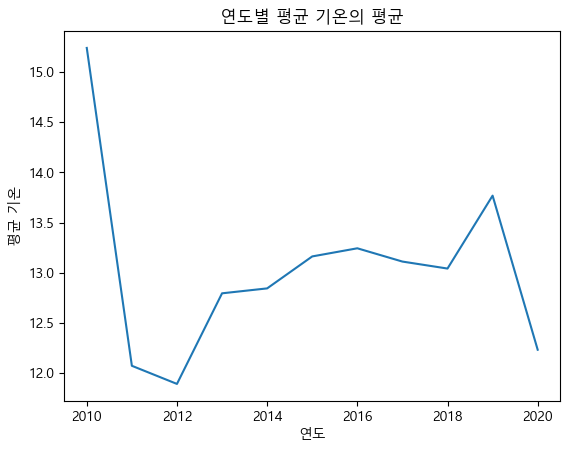

In [224]:
#연도에 weather일시 열의 year값을 저장
weather['연도'] = pd.DatetimeIndex(weather['일시']).year

#평균값 계산
yearly_mean_c = weather.groupby('연도')['평균 기온'].mean()

#그래프 그리기
yearly_mean_c.plot(kind='line')
plt.title('연도별 평균 기온의 평균')
plt.xlabel('연도')
plt.ylabel('평균 기온')
plt.show()

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

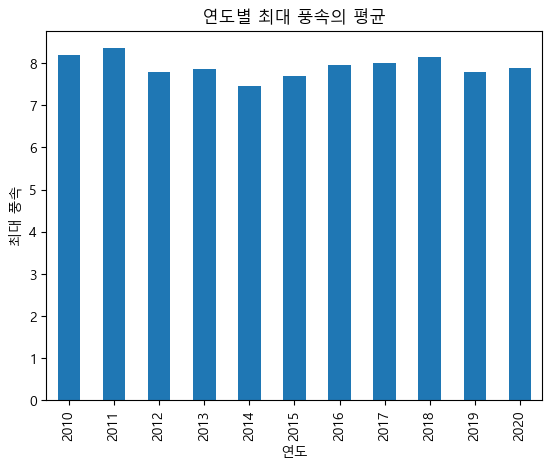

In [230]:
#연도에 weather'일시'인덱스의 year값을 저장
weather['연도'] = pd.DatetimeIndex(weather['일시']).year

#연도별 최대 풍속 평균 계산
yearly_max_w = weather.groupby('연도')['최대 풍속'].mean()

#그래프 그리기
yearly_max_w.plot(kind='bar')
plt.title("연도별 최대 풍속의 평균")
plt.xlabel("연도")
plt.ylabel("최대 풍속")
plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오


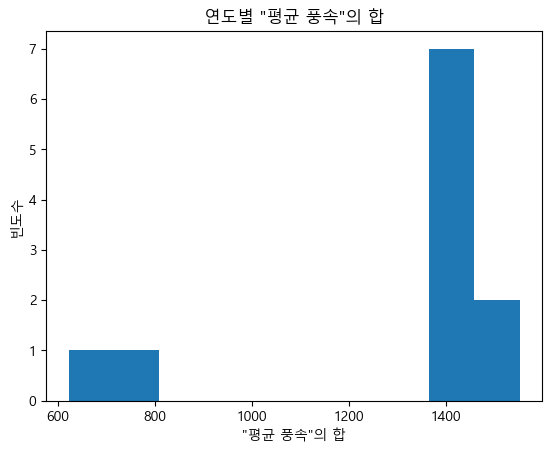

In [246]:
#연도에 weather'일시'인덱스의 year값을 저장
weather['연도'] = pd.DatetimeIndex(weather['일시']).year

#평균 풍속의 합을 sum_mean_w에 저장
sum_mean_w = weather.groupby('연도')['평균 풍속'].sum()

#히스토그램 그래프 그리기
sum_mean_w.plot(kind='hist')
plt.title('연도별 "평균 풍속"의 합')
plt.xlabel('"평균 풍속"의 합')
plt.ylabel('빈도수')
plt.show()

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [241]:
#각 연도의 평균 저장
temp_2015 = weather.loc[weather["연도"] == 2015, '평균 기온'].mean()
temp_2016 = weather.loc[weather["연도"] == 2016, '평균 기온'].mean()

#평균 비교
if temp_2015 > temp_2016:
    hot_year = "2015년" 
else:
    hot_year = "2016년"
#결과값 출력
print(f"{hot_year}이 더웠다.")

2016년이 더웠다.


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [242]:
#'일시'인덱스의 달 정보를 weather['월'] 열에 저장
weather['월'] = pd.DatetimeIndex(weather['일시']).month

#월별 평균 기온의 합을 sum_month에 저장
sum_month = weather.groupby('월')['평균 기온'].sum()

#최대, 최소값
min_month = sum_month.idxmin()
max_month = sum_month.idxmax()

#결과값 출력
print(f"합이 가장 적은 달: {min_month}, 합이 가장 많은 달: {max_month}")

합이 가장 적은 달: 1, 합이 가장 많은 달: 8


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [245]:
#연도에 weather'일시'인덱스의 year값을 저장
weather['연도'] = pd.DatetimeIndex(weather['일시']).year

#연도별 최대 풍속 평균 계산
yearly_max_w = weather.groupby('연도')['최대 풍속'].mean()

#가장 큰 연도 인덱스 검색
yearly_biggest_w = yearly_max_w.idxmax()

#출력
print(f"최대 풍속의 평균이 가장 큰 연도: {yearly_biggest_w}")

최대 풍속의 평균이 가장 큰 연도: 2011
